(1745789, {'A': 571392, 'T': 579705, 'G': 293230, 'C': 301462})


/Users/kairuoyan/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


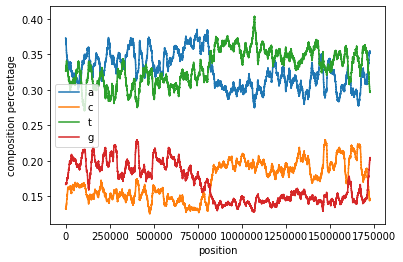

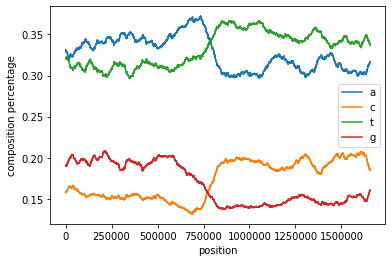

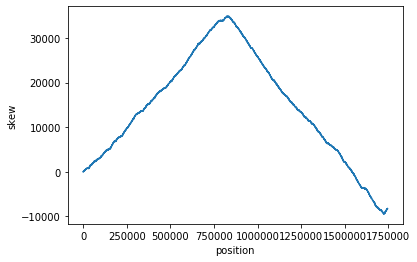

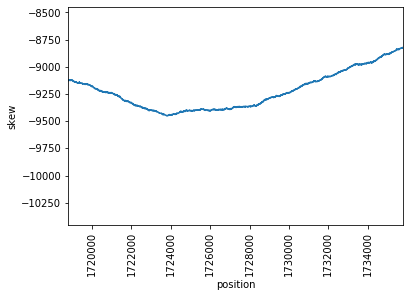

1723790
{'TGTGGATAA'}
{'TTTTATTTT'}
{'TATGTTTTT', 'TTTTTTGAA', 'TTTTTTTGA', 'ATGTTTTTT'}


In [1]:
from Bio import Entrez, SeqIO

import matplotlib.pyplot as pyplot



""""
Title: Computational Biology 309 Lab 1 -  Searching for a bacterial replication origin

Authors: Xinduo Fan, Yanni Guo and Kairuo Yan

Date: 9/17/2021
"""

def readGenome(name):
    """
    read the genome in a fasta file and return the dna within as a string value
    Parameters
    ----------
    name : (string) the name of the FASTA file that contains the bacterial genome sequence

    Returns
    -------
    Genome: (string) the bacterial genome in the given FASTA file 
    """

    record = SeqIO.read( (name + '.fasta'),'fasta') #read function from Bioppython to read the FASTA file
    genome = str(record.seq)                        #transform sequence into a string 
    return genome                                   #return sequence string

def baseContent(dna):
    """
    count the length and its  base composition of the given dna string
    Parameters
    ----------
    dna : (string) DNA sequence of bacterial genome

    Returns
    -------
     (int) size of the bacterial genome
     (dictionary) frequency of each base of the bacterial genome

    """

    Freq = {}                   #initialize dictionary
    for nt in dna:              #for loop iterates over each base in the dna sequence
        if nt not in Freq:      #if base not in dictionary, then create a new item
            Freq[nt] = 0        
        Freq[nt] += 1           #add 1 value to frequency 

    return len(dna),Freq            

def localizedBaseContent(dna, windowsize):
    """
    use a given-size window to "slide down" the DNA sequence, and plot the base composition of each
    window (in percentage) on a graph (each line represents one kind of nucleotides).

    Parameters
    ----------
    dna : (string) DNA sequence of bacterial genome
    windowsize : (int) the size of the sliding window (how many nucleotides are we looking at for each window)

    Returns
    -------
    Shows a plot presenting the distribution of the base composition in presentage
    with the genome position as the x axis and base composition (%) as the y axis. 
    """

    a = []                                   #empty lists for each base of the DNA sequence: A,T,C,G
    c = []
    g = []
    t = []
    a_p = 0                                  #the base compostion in percentage at certain window
    c_p = 0
    g_p = 0
    t_p = 0

    start_window = dna[0:windowsize-1]       #create window
    for nt in start_window:                  #for loop to iterate over each index in the window
        if nt == 'A':                        #if index equals base 'A', then add one value divide by entire window length for percentage
            a_p += (1/windowsize)            #repeat previous comment for each base
        elif nt == 'C':
            c_p += (1/windowsize)
        elif nt == 'G':
            g_p += (1/windowsize)
        elif nt == 'T':
            t_p += (1/windowsize)     
    a.append(a_p)                            #append % base composition of each window for each base to their corresponding empty list
    c.append(c_p)
    g.append(g_p)
    t.append(t_p)

    front = 0                                #track first index within the window
    for nt_p in range(windowsize,len(dna)):  #for index at the end of each window 
        front_nt = dna[front]                #locate first base within the previous window
        if front_nt == 'A':                  #subtract % base composition of first index of previous window
            a_p -= (1/windowsize)            
        elif front_nt == 'C':
            c_p -= (1/windowsize)
        elif front_nt == 'G':
            g_p -= (1/windowsize)
        elif front_nt == 'T':
            t_p -= (1/windowsize)  
        front += 1                          #track first index within the current window

        nt = dna[nt_p]                      #locate last base within the current window
        if nt == 'A':                       #add % base composition of last index of current window
            a_p += (1/windowsize)           
        elif nt == 'C':
            c_p += (1/windowsize)
        elif nt == 'G':
            g_p += (1/windowsize)
        elif nt == 'T':
            t_p += (1/windowsize)   
        a.append(a_p)                       #append the % base composition per window for each base to their corresponding list
        c.append(c_p)
        g.append(g_p)
        t.append(t_p)

    pyplot.plot(range(len(a)),a,label = "a")                                                    #plot % frequencty of base 'A' per sliding window size
    pyplot.plot(range(len(c)),c,label = "c")                                                    #plot % frequency of base 'C' per sliding window size
    pyplot.plot(range(len(t)),t,label = "t")                                                    #plot % frequency of base 'T' per sliding window size
    pyplot.plot(range(len(g)),g,label = "g")                                                    #plot % frequency of base 'G' per sliding window size
    pyplot.legend()                                                                             #legend shows colors for each corresponding base
    pyplot.xlabel('position')                                                                   #x axis with genome positions as units    
    pyplot.ylabel('composition percentage')                                                     #y axis with sequence base composition as %
    pyplot.show()                                                                               #execute plot

def skewDiagram(dna):
    """
    Parameters
    ----------
    dna : (string) DNA sequence of bacterial genome

    Returns
    -------
    min_p: (int) the position of the minimum skew value
    also shows 2 skew diagragms: 
    one for the whole DNA sequence and one for the region centered at the min_p
    """

    

    skew = 0                                                    #count for the number of C and G bases in DNA sequence
    skewList = []                                               #empty list to contain skew of sequence
    peak = (0,0)                                                #initialize maximum variable (peak[0] keeps track of the index, peak[1] records the value)
    min = (0,0)                                                 #initialize minimum variable (min[0] keeps track of the index, min[1] records the value)

    for nt in dna:                                              #iterate over each base in the DNA sequence
        if nt == 'C':                                           #if the base is 'C' then skew value minus one, if the base is 'G' then skew value plus one value
            skew-=1
        elif nt == 'G':
            skew +=1
            if skew > peak[1]:                                  #if current skew value is greater than previous peak value, variable "peak" record current index and value
                peak = (len(skewList),skew)
            if skew < min[1]:                                   #if current skew value is less than previous min value, variable "min" record current index and value
                min = (len(skewList),skew)
        skewList.append(skew)                                   #append skew value into list

    pyplot.plot(range(len(dna)),skewList)                       #plot skew diagram  
    pyplot.xlabel('position')
    pyplot.ylabel('skew')
    pyplot.show()

    min_p = 0                                                   #initialize variable to record minimum position
    if peak != (0,0):                                           #if the maximum is not at starting point
        skewList_min = []                                       #empty list to store new skew values
        for nt in dna[peak[0]:] :                               #iterate over dna sequence from the maximum position
            if nt == 'C':                                       #calculate new skew values
                skew-=1
            elif nt == 'G':                                     
                skew +=1
            if skew < min[1]:                                   #if skew value is less than minimum value, variable "min" record current index and value
                min = ( len(skewList_min),skew)                 
                min_p = peak[0]+min[0]                          #variable "min_p" calculate the origin minimum position
            skewList_min.append(skew)                           #append new skew value to skew list
        for nt in dna[:peak[0]]:                                #iterate over dna sequence up to the peak position
            if nt == 'C':                                       #calculate new skew values
                skew-=1
            elif nt == 'G':
                skew +=1
            if skew < min[1]:                                   #if skew value is less than minimum value, "min" variable records new index and value
                min = ( len(skewList_min) ,skew)
                min_p = min[0]-(len(skewList)-peak[0])          #variable "min_p" calculate the origin minimum position
            skewList_min.append(skew)                           #append new skew value to skew list
    
    pyplot.plot(range(len(dna)),skewList)                       #plot skew diagram  
    pyplot.xlabel('position')
    pyplot.ylabel('skew')
    pyplot.axis([min_p-5000,min_p+12000,skewList[min_p]-1000,skewList[min_p]+1000])
    pyplot.xticks(rotation=90)
    pyplot.show()
    return min_p                                                #return position of minimum skew value

def FrequentPatterns(dna, k, window_position = 0, windowsize = 0):

    """
     Parameters
    ----------
    dna : (string) DNA sequence of bacterial genome
    k : (int) number of bases in the dna sequence
    window_position : (int) location of window in the DNA sequence, initialized as 0 when no value is passed into the function
    windowsize : (int) length of window on DNA sequence, initialized as 0 when no value is passed into the function

    Returns
    ---------
    mostFreqPatterns: (set) the set of the most freq k-mers in DNA sequence
    """

    Freq = {}                                                           #empty dictionary 
    
    if windowsize == 0:                                                 #if the user didn't set window size, then window size is the length of DNA sequence
        windowsize = len(dna)
    if window_position != 0:                                            #if the user choose a window position, then make it the center of the window
        window_position -= windowsize // 2
    
    for i in range(window_position,window_position+windowsize-k+1 ):    #for k-mers in the window,count their frequency
        pattern = dna[i:i+k]
        if pattern not in Freq:
            Freq[pattern] = 0
        Freq[pattern] += 1
    maxFreq = max(Freq.values())                                        #find the max frequency

    mostFreqPatterns = set()                                            #create a set to contain the most frequent patterns
    for pattern in Freq:                                                #go through the dictionary to find the patterns have the max frequency, and record them in the set
        if Freq[pattern] == maxFreq:
            mostFreqPatterns.add(pattern)

    return mostFreqPatterns                                             #return frequent pattern with maximum frequency

def mismatches(pattern,d):
    """
    Parameters
    ----------
    pattern : (string) continuous array of k-mer base on DNA sequence
    d : (int) number of mismatches between template and reverse complement sequence

    Returns
    -------
    neighbors: (set) neighbors with d mismatched bases
    """

    neighbors = set()                                                   #variable for empty set to store neighbors
    if d == 0:                                                          #if number of mismatches equals 0 then return empty set
        return neighbors
    if d == 1:                                                          #if the number of mismatches equals 1 then:
        for i in range(len(pattern)):                                   #iterate over index of the pattern
            if pattern[i] != 'A':                                       #if index of pattern is not equal to a certain base, then pass through condition 
                pattern_ = pattern[:i] + 'A' + pattern[i+1:]            #specified base (not the same as the original one) is inserted at current iterated index
                neighbors.add(pattern_)                                 #add pattern to the neighbor set
            if pattern[i] != 'C':
                pattern_ = pattern[:i] + 'C' + pattern[i+1:]
                neighbors.add(pattern_)
            if pattern[i] != 'T':
                pattern_ = pattern[:i] + 'T' + pattern[i+1:]
                neighbors.add(pattern_)
            if pattern[i] != 'G':
                pattern_ = pattern[:i] + 'G' + pattern[i+1:]
                neighbors.add(pattern_)
        return neighbors                                                #return neighbor

    d -= 1                                                              
    closeneighbors = mismatches(pattern,d)                              #variable equals mismatches for k-mer base and number of mismatches

    for pattern_n in closeneighbors:                                    #iterate over pattern of reverse complementary strand in new variable
        for i in range(len(pattern_n)):                                 #iterate over index in range of number of patterns
            if pattern[i] == pattern_n[i]:                              #if index of template pattern equals index of pattern on reverse complementary strand
                if pattern_n[i] != 'A':                                 #if index of pattern on reverse strand doesn't equal specified base then pass through condition
                    pattern_ = pattern_n[:i] + 'A' + pattern_n[i+1:]    #specified base is inserted between last index of previous pattern and index plus 1 of following pattern on reverse strand
                    neighbors.add(pattern_)                             #add pattern to neighbor set
                if pattern_n[i] != 'C':
                    pattern_ = pattern_n[:i] + 'C' + pattern_n[i+1:]
                    neighbors.add(pattern_)
                if pattern_n[i] != 'T':
                    pattern_ = pattern_n[:i] + 'T' + pattern_n[i+1:]
                    neighbors.add(pattern_)
                if pattern_n[i] != 'G':
                    pattern_ = pattern_n[:i] + 'G' + pattern_n[i+1:]
                    neighbors.add(pattern_)
    return neighbors.union(closeneighbors)                              #return total neighbors combined

def reverse_complement(pattern):

    """
    Parameters
    ----------
    pattern : (string) a k-mer pattern on DNA sequence

    Returns
    -------
    rev: (string) of reverse complement strand
    """

    rev = ""                   #emtpy string
    for i in pattern:          #iterate over index of pattern in sequence
        if i == "A" :          #if index equals a base, then the string becomes the corresponding reverse base depedning on the condition: A/T and C/G
            rev = rev + 'T'
        if i == "T" :
            rev = rev + 'A'
        if i == "C" :
            rev = rev + 'G'
        if i == "G" :
            rev = rev + 'C'
    return rev                 #return string of reverse complement strand

def mostFreqWithComplement(dna, k, d, window_position = 0, windowsize = 0):
    """
    Parameters
    ----------
    dna : (string) DNA sequence of bacterial genome
    k : (int) number of bases in the dna sequence
    d : (int) number of mismatches between template and reverse complement strand
    window_position : (int) location of window in the DNA sequence, initialized as 0 when no value is passed into the function
    windowsize : (int) length of window on DNA sequence, initialized as 0 when no value is passed into the function

    Returns
    -------
    mostFreqPatterns: (set) the most frequent k-mers (its reverse complement and mutations with <=d mismatched bases are also counted) in the DNA sequence
    """

    Freq = {}                                                               #empty dictionary 
    if windowsize == 0:                                                     #if the user didn't set window size, then window size is the length of DNA sequence
        windowsize = len(dna)
    if window_position != 0:                                                #if the user choose a window position, then make it the center of the window
        window_position -= windowsize // 2

    for i in range(window_position,window_position+windowsize-k+1 ):        #for k-mers in the window, count their frequency
        pattern = dna[i:i+k]                                                #define pattern (value) in dna sequence
        if pattern not in Freq:                                             #if pattern not in dictionary then value in dictionary, create this item
            Freq[pattern] = 0
        Freq[pattern] += 1                                                  #add one frequency

    finalFreq = {}                                                          #new empty dictionary to record final frequency of each pattern
    for pattern in Freq:                                                    #for pattern in original frequency dictionary
        finalFreq[pattern] = Freq[pattern]                                  #initialize the final frequency of this pattern as its original frequency 
        neighbors = mismatches(pattern,d)                                   #neighbors variable records mismatches of pattern and number of mismatches
        complement = reverse_complement(pattern)                            #complement variable records reverse complementary strand of pattern
        for neighbor in neighbors:                                          #iterate over neighbor in neighbors set
            if neighbor in Freq:                                            #if neighbor in dictionary, add the frequency of this neighbor into the original pattern's final frequncy 
                finalFreq[pattern] += Freq[neighbor]
        if complement in Freq:                                              #if reverse complement strand is in dictionary then add the frequency of complement pattern to the  original pattern's final frequncy 
            finalFreq[pattern] += Freq[complement]          

    maxFreq = max(finalFreq.values())                                       #find the max frequency pattern
    mostFreqPatterns = set()                                                #new empty set to store most frequent pattern
    for pattern in finalFreq:                                               #iterate over pattern in final frequency dictionary
        if finalFreq[pattern] == maxFreq:                                   #if current pattern's frequency equals the maximum frequency
            mostFreqPatterns.add(pattern)                                   #append the pattern to the set    
    return mostFreqPatterns                                                 #return pattern with maximum frquency in sequence

def main():

    """ Where all functions are called with a given baterial genome."""

    dna = readGenome('NZ_CP019573')
    print(baseContent(dna))
    localizedBaseContent(dna,20000) 
    localizedBaseContent(dna,90000) 
    min_p = skewDiagram(dna)
    print(min_p)
    print(FrequentPatterns(dna,9,min_p,500))
    print(FrequentPatterns(dna,9))
    print(mostFreqWithComplement(dna, 9, 2,min_p,500))

main()
 

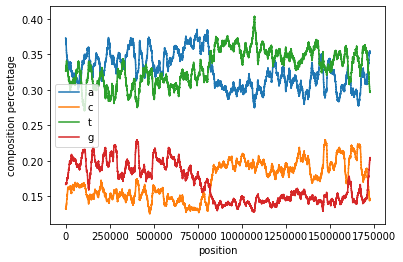

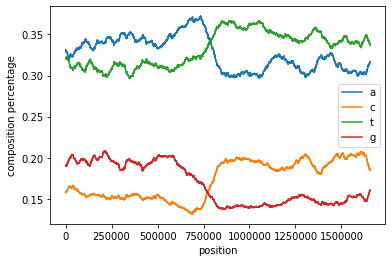

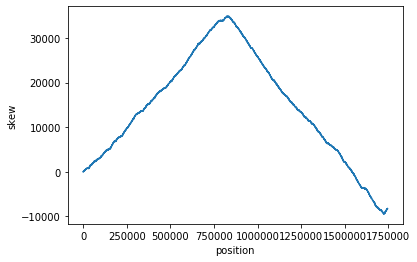

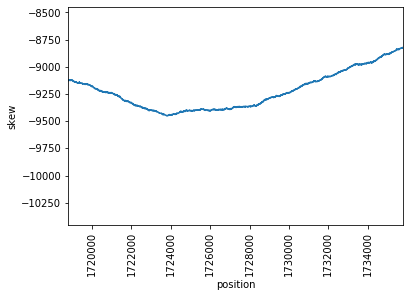

1723790
{'TGTGGATAA'}
{'TTTTATTTT'}
{'TATGTTTTT', 'TTTTTTGAA', 'TTTTTTTGA', 'ATGTTTTTT'}
